QUESTION 1:Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [311]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

In [7]:
users = pd.read_csv(url, sep='|')

In [9]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
mean_age = users.groupby('occupation')['age'].mean()

In [13]:
mean_age

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [37]:
male_ratio = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').mean());
male_ratio = male_ratio.sort_values(ascending=False);
male_ratio;

In [21]:
min_max_age = users.groupby('occupation')['age'].agg(['min', 'max'])

In [43]:
print("The Minimum and Maximum Ages Per Occupation are:") ;
print(min_max_age)

The Minimum and Maximum Ages Per Occupation are:
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [29]:
mean_age_gender = users.groupby(['occupation', 'gender'])['age'].mean()

In [41]:
print("Mean Age Per Occupation and Gender are:");
print(mean_age_gender)

Mean Age Per Occupation and Gender are:
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.

In [39]:
gender_counts = users.groupby(['occupation', 'gender']).size().unstack();
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100;
gender_percentage.columns = ['Female%', 'Male%'];
print("The Percentage of Women and Men Per Occupation are:");
print(gender_percentage);

The Percentage of Women and Men Per Occupation are:
                 Female%       Male%
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


Q2. Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [45]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [49]:
goals = euro12['Goals']
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [51]:
num_teams = euro12['Team'].nunique()
print(f"The Number of teams that participated are: {num_teams}")
num_columns = euro12.shape[1]
print(f"the Number of columns in the dataset are: {num_columns}")
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.head()

The Number of teams that participated are: 16
the Number of columns in the dataset are: 35


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [53]:
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
sorted_discipline

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [55]:
mean_yellow_cards = euro12['Yellow Cards'].mean()
print(f"The Average Yellow Cards per team are {mean_yellow_cards:.2f}")
high_scorers = euro12[euro12['Goals'] > 6]
high_scorers

The Average Yellow Cards per team are 7.44


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [57]:
teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]
teams_starting_with_g

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [59]:
first_7_columns = euro12.iloc[:, :7]
first_7_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [61]:
all_except_last_3 = euro12.iloc[:, :-3]
all_except_last_3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [63]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Q3. Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [94]:
series1 = pd.Series(np.random.randint(1, 5, 100)) #shows random integers from 1 to 4 length 100
series2 = pd.Series(np.random.randint(1, 4, 100)) #shows random int from 1 to 4  length 100
series3 = pd.Series(np.random.randint(10000, 30001, 100))  #shows random int from 10000 to 30001  length 100
print("Series 1:")
print(series1.head())

Series 1:
0    3
1    4
2    4
3    1
4    3
dtype: int32


In [96]:
print("\nSeries 2:")
print(series2.head())


Series 2:
0    3
1    2
2    3
3    3
4    2
dtype: int32


In [98]:
print("\nSeries 3:")
print(series3.head())


Series 3:
0    26629
1    28045
2    14565
3    16880
4    16591
dtype: int32


In [100]:
df = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3}) #Change the name of the columns to bedrs, bathrs, price_sqr_meter
print("Combined DataFrame:")  #Create a DataFrame by joinning the Series by column
print(df.head())

Combined DataFrame:
   bedrs  bathrs  price_sqr_meter
0      3       3            26629
1      4       2            28045
2      4       3            14565
3      1       3            16880
4      3       2            16591


In [104]:
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
print("One-Column DataFrame:")
print(bigcolumn.head()) #Displays the first few rows of one column data frame

One-Column DataFrame:
0    3
1    4
2    4
3    1
4    3
dtype: int32


In [108]:
print("Length of bigcolumn:", len(bigcolumn))
bigcolumn_reindexed = bigcolumn.reset_index(drop=True).reindex(range(300)) #Reindex the DataFrame so it goes from 0 to 299
print("Reindexed DataFrame:")
print(bigcolumn_reindexed.tail()) #Display output

Length of bigcolumn: 300
Reindexed DataFrame:
295    27910
296    23258
297    19083
298    22338
299    25399
dtype: int32


Q4. Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
66. The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day

In [222]:
import pandas as pd
import numpy as np

In [260]:
file_path = 'C:/Users/200608816/Desktop/a/wind.txt'

In [262]:
data = pd.read_csv(file_path, sep='\s+')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\200608816\AppData\Local\Temp\ipykernel_19256\3216932379.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file_path, sep='\s+')


In [264]:
print(data.head())

   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  


In [266]:

data['Date'] = pd.to_datetime(data[['Yr','Mo','Dy']].astype(str).agg('-'.join,axis=1))
data=data.set_index('Date')
data = data.drop(['Yr','Mo','Dy'],axis=1)
data

C:\Users\200608816\AppData\Local\Temp\ipykernel_19256\723023670.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data[['Yr','Mo','Dy']].astype(str).agg('-'.join,axis=1))


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [270]:
missing_values = data.isna().sum()
print("Missing values per location are:\n", missing_values)

Missing values per location are:
 RPT    0
VAL    1
ROS    0
KIL    0
SHA    1
BIR    0
DUB    0
CLA    1
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64


In [272]:
non_missing_total = data.count().sum()

print("Total non-missing values are:", non_missing_total)

Total non-missing values are: 33


In [274]:
overall_mean = data.mean().mean()

print("Overall mean wind speed are", overall_mean)

Overall mean wind speed are 12.053333333333333


In [276]:
# Generate statistics (min, max, mean, std) for each location
loc_stats = data.describe().loc[['min', 'max', 'mean',   'std']]
print("Location statistics are as follows here:\n", loc_stats)

Location statistics are as follows here:
             RPT        VAL        ROS        KIL        SHA       BIR  \
min   14.710000  14.960000  10.830000   6.500000  11.170000  6.170000   
max   18.500000  16.880000  13.170000  10.130000  12.620000  9.870000   
mean  16.083333  15.920000  12.110000   8.640000  11.895000  7.903333   
std    2.099389   1.357645   1.185411   1.900289   1.025305  1.861003   

            DUB        CLA        MUL        CLO        BEL       MAL  
min   11.250000  10.040000   8.500000   7.670000  12.750000  12.71000  
max   13.670000  10.250000  10.830000  12.580000  18.500000  15.04000  
mean  12.140000  10.145000   9.706667   9.973333  16.263333  13.86000  
std    1.330902   0.148492   1.167233   2.469015   3.080265   1.16529  


In [278]:
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)
print("Daily statistics are as follows here:\n", day_stats.head())

Daily statistics are as follows here:
              min    max       mean       std
Date                                        
2061-01-01  9.29  18.50  13.018182  2.808875
2061-01-02  6.50  17.54  11.336364  3.188994
2061-01-03  6.17  18.50  11.641818  3.681912


Q5. Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [128]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
print(chipo.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [130]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [134]:
num_observations = chipo.shape[0]
print(f"The Number of observations in the dataset are: {num_observations}")
num_columns = chipo.shape[1]                                                 #We get the number of columns in the dataset
print(f"Number of columns in the dataset: {num_columns}")


The Number of observations in the dataset are: 4622
Number of columns in the dataset: 5


In [136]:
print(f" The Column names in the dataset are: {chipo.columns}")

 The Column names in the dataset are: Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [138]:
print(f"Dataset Index: {chipo.index}")

Dataset Index: RangeIndex(start=0, stop=4622, step=1)


In [142]:
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print(f"The most ordered item is: {most_ordered_item}")

The most ordered item is: Chicken Bowl


In [144]:
most_ordered_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum() #Getting the total quantity of the most-ordered item
print(f"The Total quantity of '{most_ordered_item}' ordered is: {most_ordered_quantity}") #This displays the result

The Total quantity of 'Chicken Bowl' ordered is: 761


In [146]:
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax() #This finds the most-ordered item in the choice description column
print(f"The most ordered choice_description is are: {most_ordered_choice_description}") #This displays the result.

The most ordered choice_description is are: [Diet Coke]


In [148]:
total_items_ordered = chipo['quantity'].sum() #Calculates total number of items ordered
print(f"Total number of items ordered: {total_items_ordered}") #This displays the result

Total number of items ordered: 4972


In [154]:
chipo['item_price'] = chipo['item_price'].replace({'$': ''}, regex=True).astype(float)
print(chipo.head()) #Displays the first few rows to confirm the conversion

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  


In [156]:
print(f"The Data type of 'item_price'is: {chipo['item_price'].dtype}")

The Data type of 'item_price'is: float64


In [158]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(str(x).replace('$', '')))
print(chipo.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  


In [160]:
chipo['revenue'] = chipo['item_price'] * chipo['quantity'] #Calculating the total revenue
total_revenue = chipo['revenue'].sum() #Calculating total revenue fo rthe period
print(f"Total revenue for the period: ${total_revenue:.2f}")

Total revenue for the period: $39237.02


In [162]:
total_orders = chipo['order_id'].nunique() #Counting the number of unique orders
print(f"Total number of orders: {total_orders}") #This displays the result

Total number of orders: 1834


Q6. Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes

In [194]:
import matplotlib.pyplot

In [168]:
file_path = 'C:/Users/200608816/Desktop/a/us-marriages-divorces-1867-2014.csv'

In [170]:
data = pd.read_csv(file_path)

In [172]:
print(data.head())

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


In [188]:
data['Marriages_per_capita'] = data['Marriages']/data['Population']
data['Divorces_per_capita'] =data['Divorces']/data['Population']

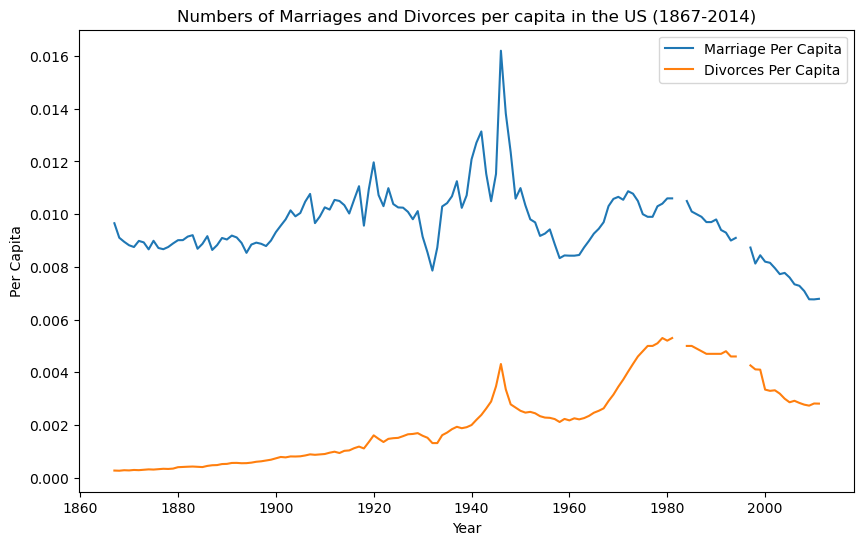

In [200]:
plt.figure(figsize=(10,6))
plt.plot(data['Year'],data['Marriages_per_capita'], label ='Marriage Per Capita')
plt.plot(data['Year'],data['Divorces_per_capita'],label ='Divorces Per Capita')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Numbers of Marriages and Divorces per capita in the US (1867-2014)')
plt.legend()
plt.show()


Q7. Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [290]:
file_path = 'C:/Users/200608816/Desktop/a/us-marriages-divorces-1867-2014.csv'

In [292]:
data = pd.read_csv(file_path) #Reads the dataset
print(data.head())

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


In [294]:
filtered_data = data[data['Year'].isin([1900, 1950, 2000])] #Filtering data for the specific years as we need 
print(filtered_data) #Displays the specific years we filtered through the dataset

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
33   1900   709000.0   56000.0    76094000                 9.3   
83   1950  1667000.0  385000.0   151684000                11.0   
133  2000  2315000.0  944000.0   282398000                 8.2   

     Divorces_per_1000  
33                 0.7  
83                 2.5  
133                3.3  


In [296]:
bar_width = 5.5

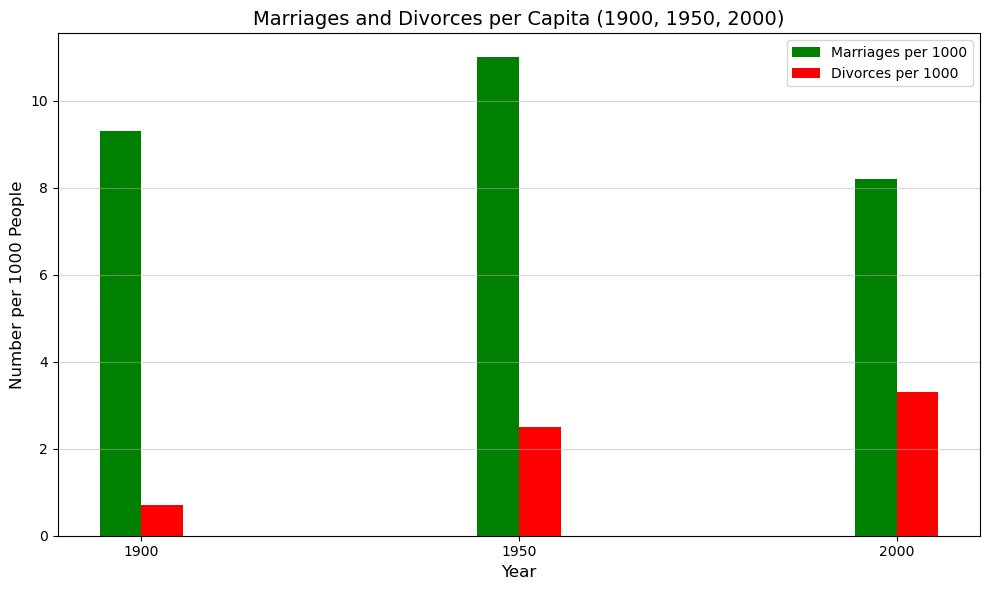

In [298]:
x = filtered_data['Year']
x_positions_marriages = x - bar_width / 2
x_positions_divorces = x + bar_width / 2

# Create the plot

plt.figure(figsize=(10, 6))

# Add bars for marriages

plt.bar(x_positions_marriages, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', color='green')


# Add bars for divorces

plt.bar(x_positions_divorces, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', color='red')

# Add labels, title, and legend

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number per 1000 People', fontsize=12)
plt.title('Marriages and Divorces per Capita (1900, 1950, 2000)', fontsize=14)
plt.xticks(x)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

# Show the plot

plt.show()

Q8. Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes

In [325]:
file_path = 'C:/Users/200608816/Desktop/a/actor_kill_counts.csv'

In [329]:
data = pd.read_csv(file_path) #Reads the dataset
print(data.head()) #Displays the Dataset

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

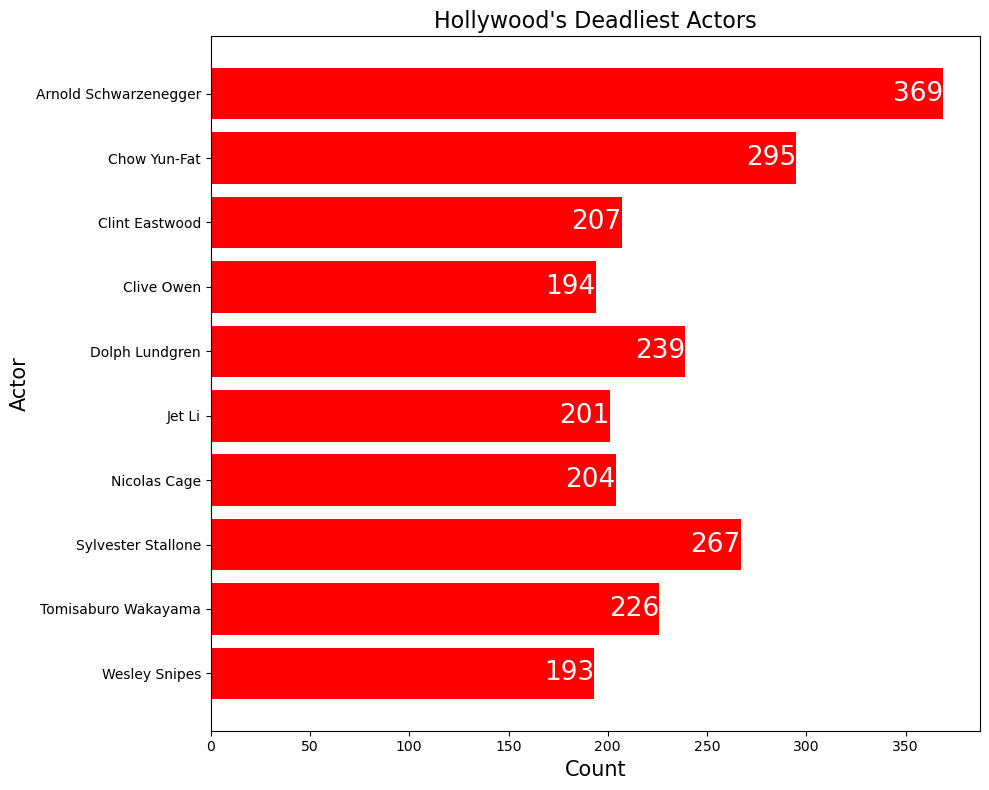

In [331]:
#Plots the horizontal bar chart

plt.figure(figsize=(10, 8))  # Sets the figure size

plt.barh(data['Actor'], data['Count'], color='red')  # Create a horizontal bar chart

#Adds chart labels and title
plt.xlabel('Count', fontsize=15)  # X-axis label

plt.ylabel('Actor', fontsize=15)  # Y-axis label

plt.title('Hollywood\'s Deadliest Actors', fontsize=16)  # Chart title

#Annotates each bar with kill count
for index, value in enumerate(data['Count']):
    plt.text(value, index, str(value), va='center', ha='right', fontsize=19, color='white')

#Adjust layout and display the chart
plt.tight_layout()  # Adjust layout to fit elements

plt.gca().invert_yaxis()  # Invert y-axis to display the actor with the highest kill count on top

plt.show() #Display the chart

Q9. Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories

In [333]:
file_path = 'C:/Users/200608816/Desktop/a/'

In [335]:
data = pd.read_csv(file_path) #Reads the dataset
print(data.head()) #Displays the results

    Emperor  Length_of_Reign         Cause_of_Death
0  Augustus            40.58  Possibly assassinated
1  Tiberius            22.50  Possibly assassinated
2  Caligula             4.83           Assassinated
3  Claudius            13.75  Possibly assassinated
4      Nero            13.67                Suicide


In [337]:
death_counts = data['Cause_of_Death'].value_counts()
assassinated_count = death_counts.get('Assassinated', 0) #Extract the number of assassinated emperors
total_emperors = data.shape[0] #Calculate the total emperors
# Calculate the fraction for each category
other_count = total_emperors - assassinated_count
fractions = [assassinated_count, other_count]
labels = ['Assassinated', 'Other Causes']

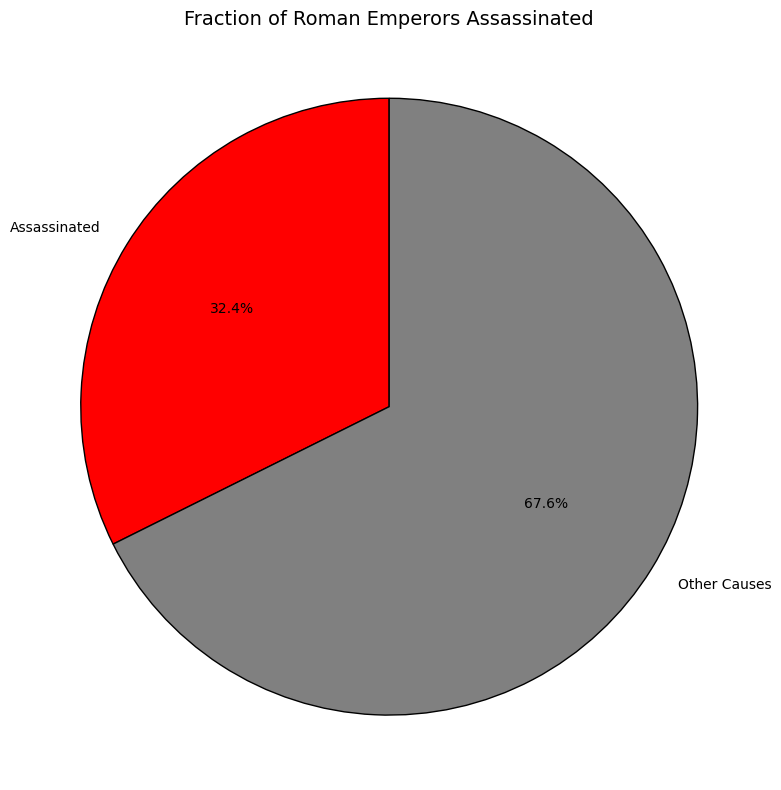

In [339]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    fractions,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['red', 'gray'],
    wedgeprops={'edgecolor': 'black'}
)

# Sets aspect ratio to be equal so the pie chart is circular
plt.title('Fraction of Roman Emperors Assassinated', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()

# Displays the plot
plt.show()

Q10. Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [341]:
file_path = 'C:/Users/200608816/Desktop/a/arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(file_path) #Reads the dataset
print(data.head()) #Displays the result

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  


In [343]:
print(data.columns)

Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')


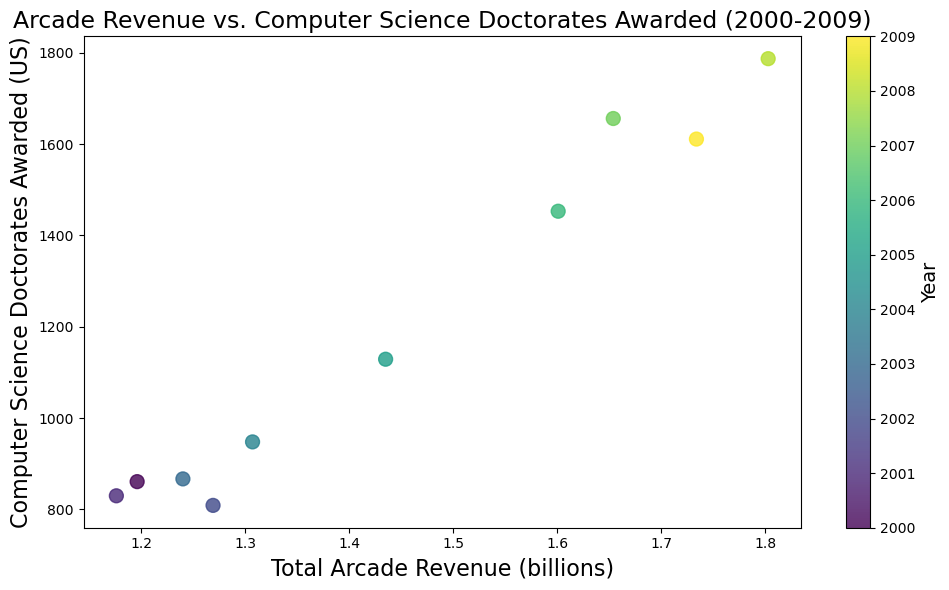

In [345]:
#Creating a scatter plot
plt.figure(figsize=(10, 6))

#Scatter plot with color based on 'Year'

scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'],
    data['Computer Science Doctorates Awarded (US)'],
    c=data['Year'], cmap='viridis', s=100, alpha=0.8
)

#Label the axes and add a title

plt.xlabel('Total Arcade Revenue (billions)', fontsize=16)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize=16)
plt.title('Arcade Revenue vs. Computer Science Doctorates Awarded (2000-2009)', fontsize=17)

# Add a color bar to indicate years
colorbar = plt.colorbar(scatter)
colorbar.set_label('Year', fontsize=14)

# displays the plot

plt.tight_layout()
plt.show()